# Curso: (Mini) Introdução ao Python para processamento e análise de dados 
Maurício Garcia, março 2023

## Revisando Pandas

In [1]:
import pandas as pd


## Acessando Google Sheet

Obter o sharable link:  
https://docs.google.com/spreadsheets/d/1bRTW8_ZQzyqLaNSR5cP_mw9Yb_yEAS1t/edit?usp=share_link&ouid=116157839543199465705&rtpof=true&sd=true  

Colar no navegador e ele irá gerar esse link:  
https://docs.google.com/spreadsheets/d/1bRTW8_ZQzyqLaNSR5cP_mw9Yb_yEAS1t/edit#gid=1357010444  

Usar esse link no comando abaixo:

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1bRTW8_ZQzyqLaNSR5cP_mw9Yb_yEAS1t/edit#gid=1357010444'

In [3]:
url = url.replace('/edit#gid=', '/export?format=csv&gid=')

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Nome,RG,CPF,Sexo,Nascimento
0,Clarice Gonzales,88829099450,49492282913,F,2008-02-25
1,Maria Isis Ramos,43437187759,83067956448,F,1999-02-27
2,Daniela Palma,58946054283,32723668271,M,1982-03-03
3,Maria da Conceição Antunes,23000712291,39961145321,F,1973-03-05
4,Valentina Williams,68948263392,39936634316,F,1956-03-09


### Criando novas colunas

In [6]:
df['Nascimento2'] = pd.to_datetime(df['Nascimento'])

In [7]:
df['Idade'] = (pd.to_datetime('today') - df['Nascimento2']).dt.days

In [8]:
masculino = (df['Sexo'] == 'M')
df['Target'] = 0
df.loc[masculino, 'Target'] = 1

In [9]:
df.head()

,Nome,RG,CPF,Sexo,Nascimento,Nascimento2,Idade,Target
0,Clarice Gonzales,88829099450,49492282913,F,2008-02-25,2008-02-25,5492,0
1,Maria Isis Ramos,43437187759,83067956448,F,1999-02-27,1999-02-27,8777,0
2,Daniela Palma,58946054283,32723668271,M,1982-03-03,1982-03-03,14982,1
3,Maria da Conceição Antunes,23000712291,39961145321,F,1973-03-05,1973-03-05,18267,0
4,Valentina Williams,68948263392,39936634316,F,1956-03-09,1956-03-09,24472,0


## Um pouco sobre gráficos ...

<AxesSubplot:xlabel='Sexo'>

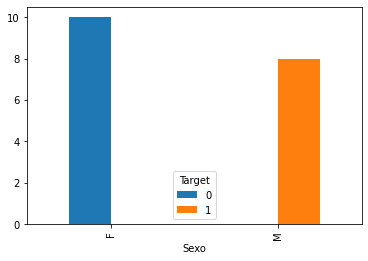

In [10]:
pd.crosstab(df['Sexo'],df['Target']).plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

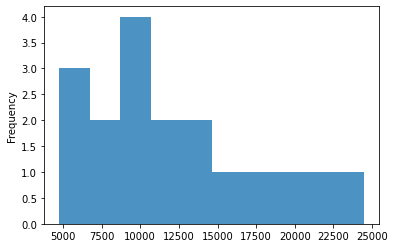

In [11]:
df['Idade'].plot.hist(bins=10, alpha=0.8)

array([[<AxesSubplot:title={'center':'RG'}>,
        <AxesSubplot:title={'center':'CPF'}>],
       [<AxesSubplot:title={'center':'Nascimento2'}>,
        <AxesSubplot:title={'center':'Idade'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

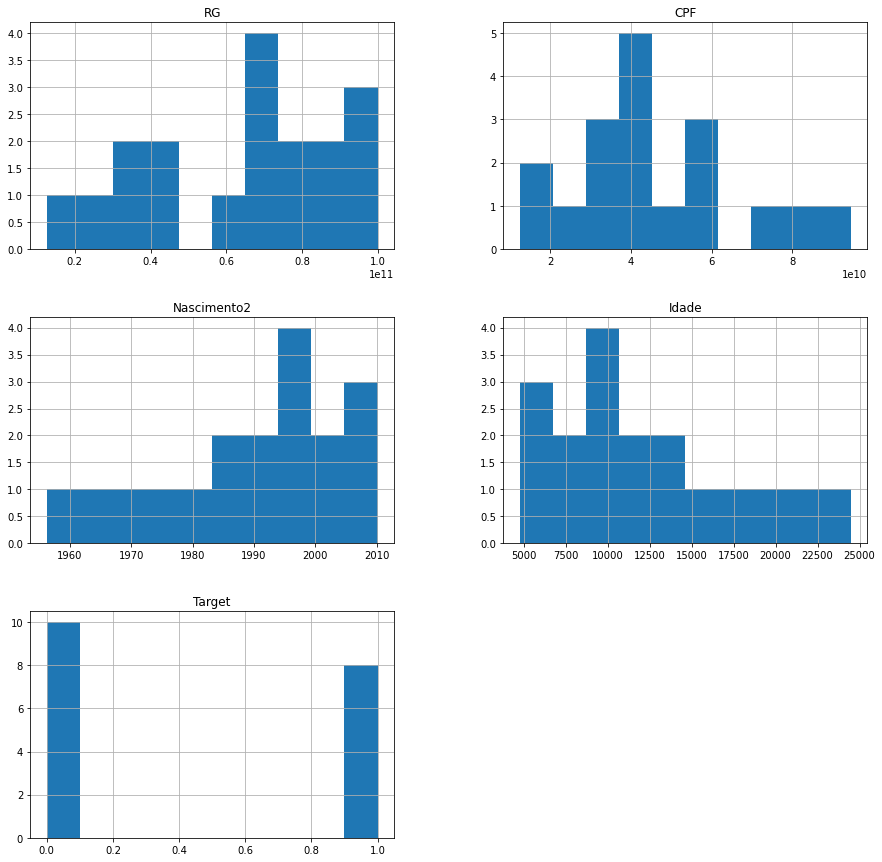

In [12]:
df.hist(bins=10, figsize=(15, 15))

In [13]:
# Ver mais em https://github.com/mgarlabx/mathplotlib